In [1]:
%load_ext autoreload
%autoreload 2
from __future__ import division, print_function, absolute_import
import numpy as np
import matplotlib.pyplot as plt
fig_width = 12
%matplotlib inline


# the switching binomial generative model


## likelihood function

In [2]:
import bayesianchangepoint as bcp
help(bcp.likelihood)

Help on function likelihood in module bayesianchangepoint.bcp:

likelihood(o, p, r)
    Knowing p and r, the likelihood of observing o is that of a binomial of
    
        - mean rate of chosing hypothesis "o=1" = (p*r + o)/(r+1)
        - number of choices where  "o=1" equals to p*r+1
    
    since both likelihood sum to 1, the likelihood of drawing o in {0, 1}
    is equal to



In [3]:
for p_ in [0, .25, .5, .75, 1]:
    for r in (2**np.arange(5)-1):
        print('Knowing p=', p_, 'and r=', r, ', the likelihood for 0=', bcp.likelihood(0, p_, r), ', for 1=', bcp.likelihood(1, p_, r), ', sum=', bcp.likelihood(0, p_, r)+bcp.likelihood(1, p_, r))

Knowing p= 0 and r= 0 , the likelihood for 0= 0.5 , for 1= 0.5 , sum= 1.0
Knowing p= 0 and r= 1 , the likelihood for 0= 0.8 , for 1= 0.2 , sum= 1.0
Knowing p= 0 and r= 3 , the likelihood for 0= 0.9045936395759717 , for 1= 0.09540636042402827 , sum= 1.0
Knowing p= 0 and r= 7 , the likelihood for 0= 0.9532098019182014 , for 1= 0.04679019808179863 , sum= 1.0
Knowing p= 0 and r= 15 , the likelihood for 0= 0.976812163875552 , for 1= 0.023187836124448087 , sum= 1.0000000000000002
Knowing p= 0.25 and r= 0 , the likelihood for 0= 0.5 , for 1= 0.5 , sum= 1.0
Knowing p= 0.25 and r= 1 , the likelihood for 0= 0.6386676768158934 , for 1= 0.3613323231841066 , sum= 1.0
Knowing p= 0.25 and r= 3 , the likelihood for 0= 0.6923111756016641 , for 1= 0.30768882439833595 , sum= 1.0
Knowing p= 0.25 and r= 7 , the likelihood for 0= 0.7201814563014943 , for 1= 0.2798185436985056 , sum= 1.0
Knowing p= 0.25 and r= 15 , the likelihood for 0= 0.7347677771670017 , for 1= 0.26523222283299835 , sum= 1.0
Knowing p= 0.

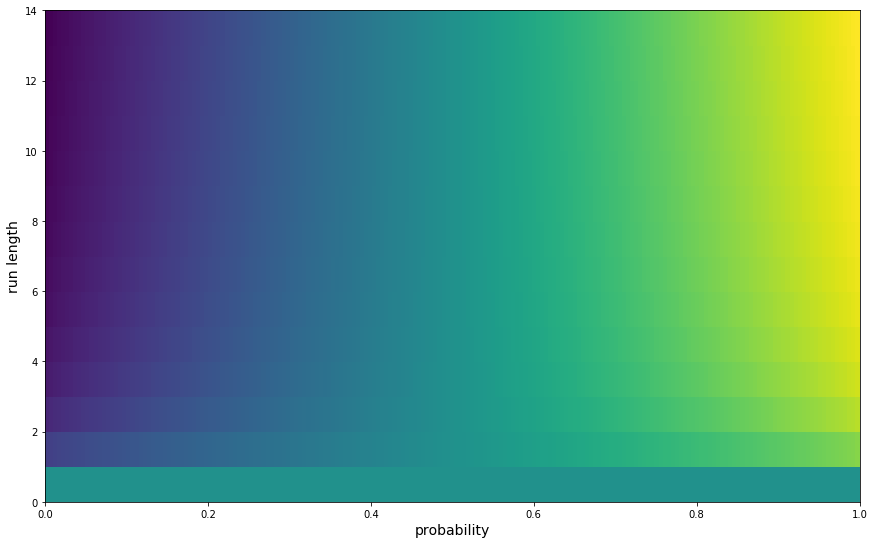

In [4]:
fig_width= fig_width
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.6180), sharex=True)

p, r = np.meshgrid(np.linspace(0., 1., 200, endpoint=True), np.arange(15))

L = bcp.likelihood(o=1, p=p, r=r)

CS = ax.pcolormesh(p, r, L)

fig.tight_layout()
ax.set_ylabel('run length', fontsize=14)
#axs[i_layer].axis('tight')
ax.set_xlabel('probability', fontsize=14);

In [5]:
print(L)

[[0.5        0.5        0.5        ... 0.5        0.5        0.5       ]
 [0.2        0.20567954 0.21032469 ... 0.78967531 0.79432046 0.8       ]
 [0.12903226 0.13597558 0.14154403 ... 0.85845597 0.86402442 0.87096774]
 ...
 [0.02859638 0.03594395 0.04176413 ... 0.95823587 0.96405605 0.97140362]
 [0.02653335 0.0338311  0.03962036 ... 0.96037964 0.9661689  0.97346665]
 [0.02474802 0.0319973  0.03775709 ... 0.96224291 0.9680027  0.97525198]]


## performing inference: application to synthetic data

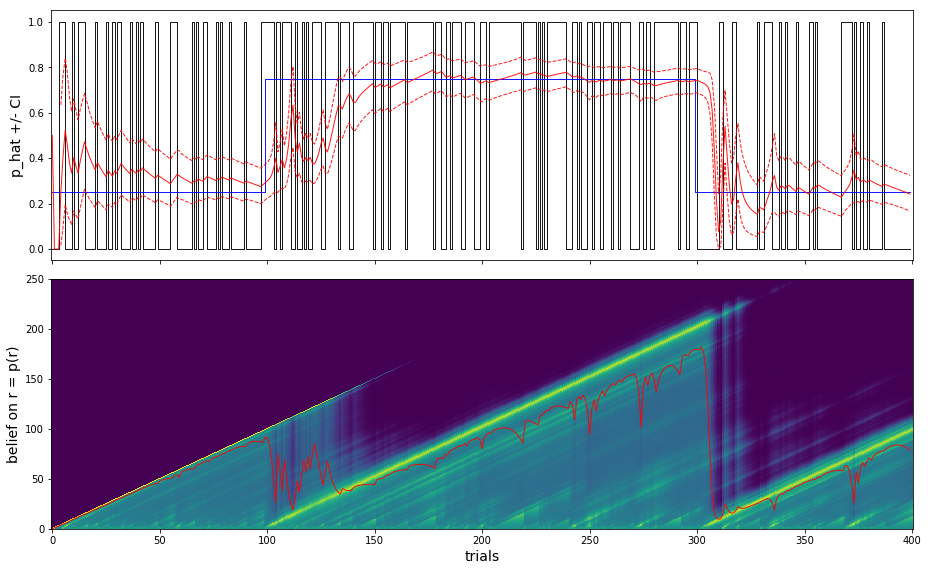

In [6]:
T = 400
mode = 'expectation'
p_gen = .25 * np.ones(T)
p_gen[100:300] = .75
np.random.seed(42)
o = 1 * (p_gen > np.random.rand(T))

p_bar, r, beliefs = bcp.inference(o, h=1/200, p0=.5)
fig, axs = bcp.plot_inference(o, p_gen, p_bar, r, beliefs, max_run_length=250, mode=mode)

## different read-outs

The full Bayesian models provides with a probabilistic representation of the pdf of $p$ for all possible run-length values. 
Instead of using the expectation (as above), one could use another readout mode, such as to take the run-length with maximal probability:

In [7]:
p_bar, r, beliefs = bcp.inference(o, h=1/200, p0=.5)

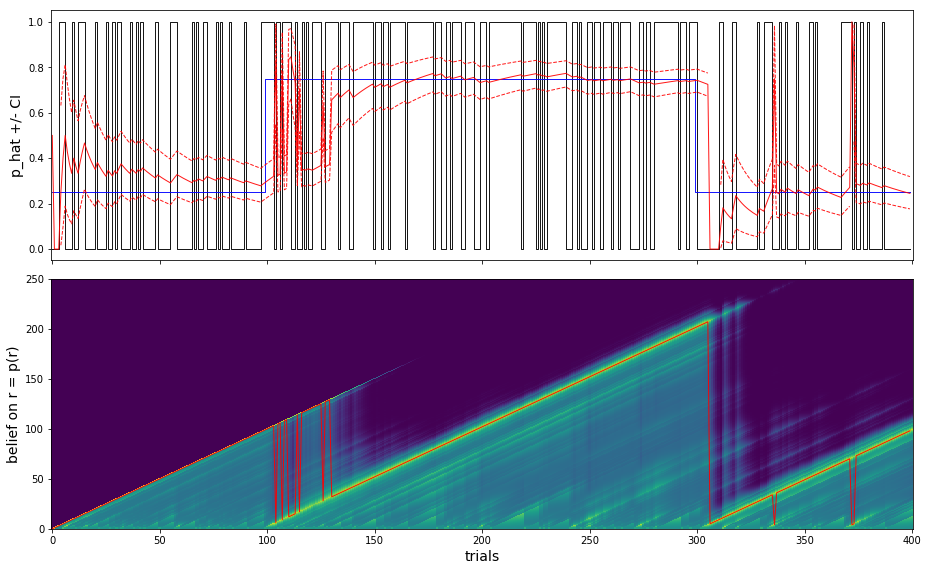

In [8]:
fig, axs = bcp.plot_inference(o, p_gen, p_bar, r, beliefs, max_run_length=250, mode='max')

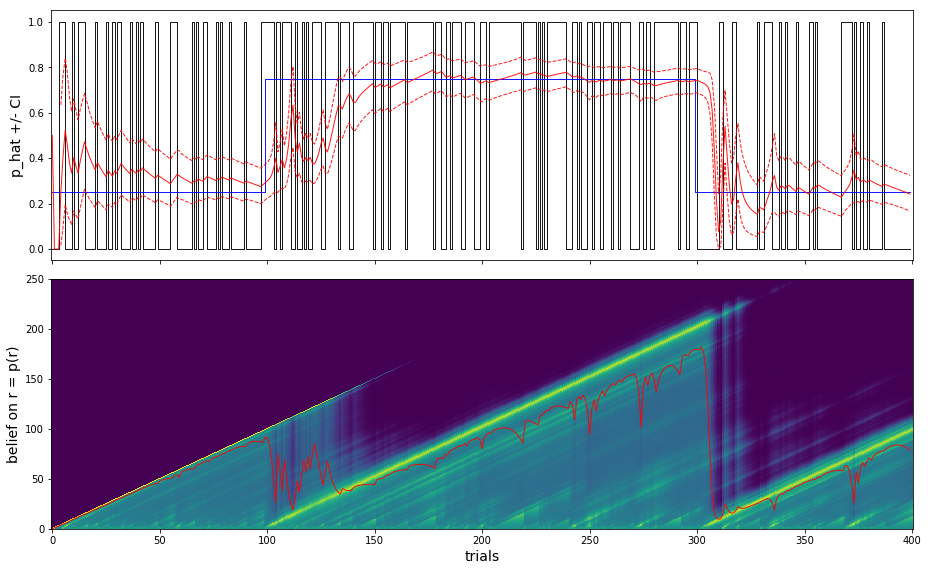

In [9]:
fig, axs = bcp.plot_inference(o, p_gen, p_bar, r, beliefs, max_run_length=250, mode='expectation')

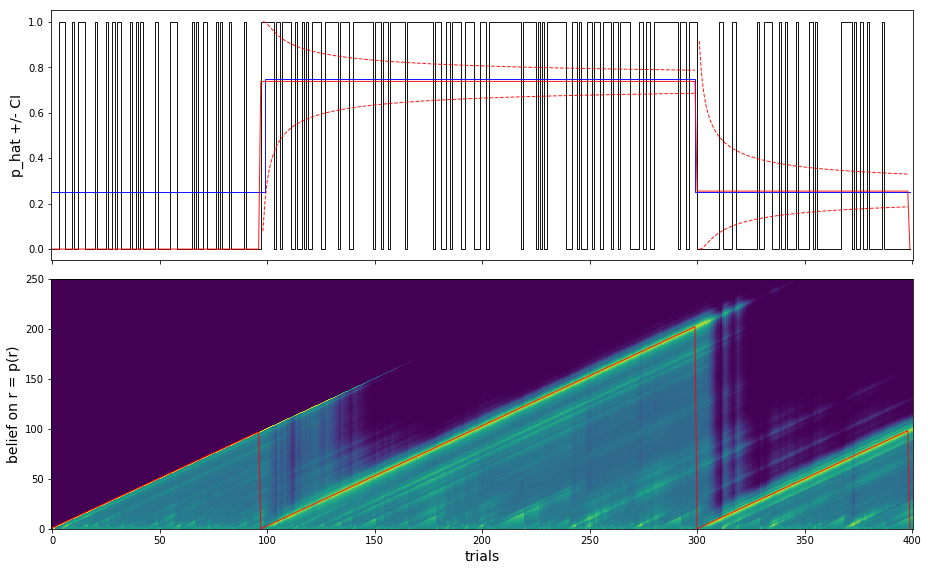

In [10]:
fig, axs = bcp.plot_inference(o, p_gen, p_bar, r, beliefs, max_run_length=250, mode='hindsight')

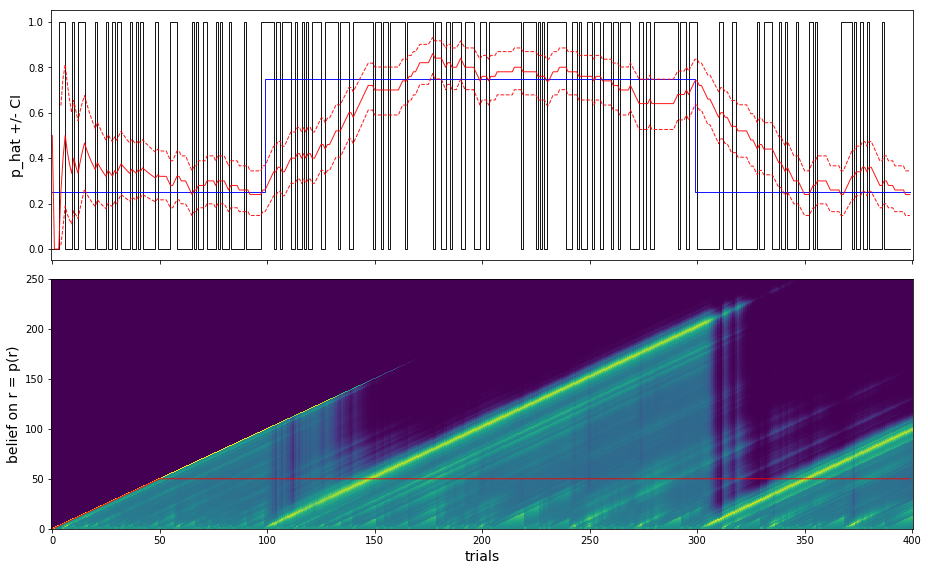

In [11]:
fig, axs = bcp.plot_inference(o, p_gen, p_bar, r, beliefs, max_run_length=250, mode='fixed', fixed_window_size=50)

## testing different hazard rates

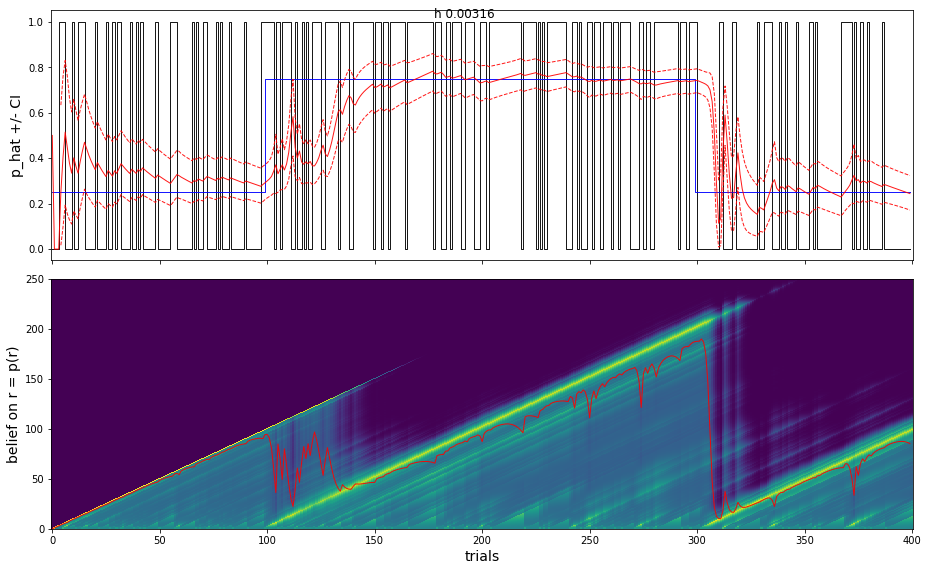

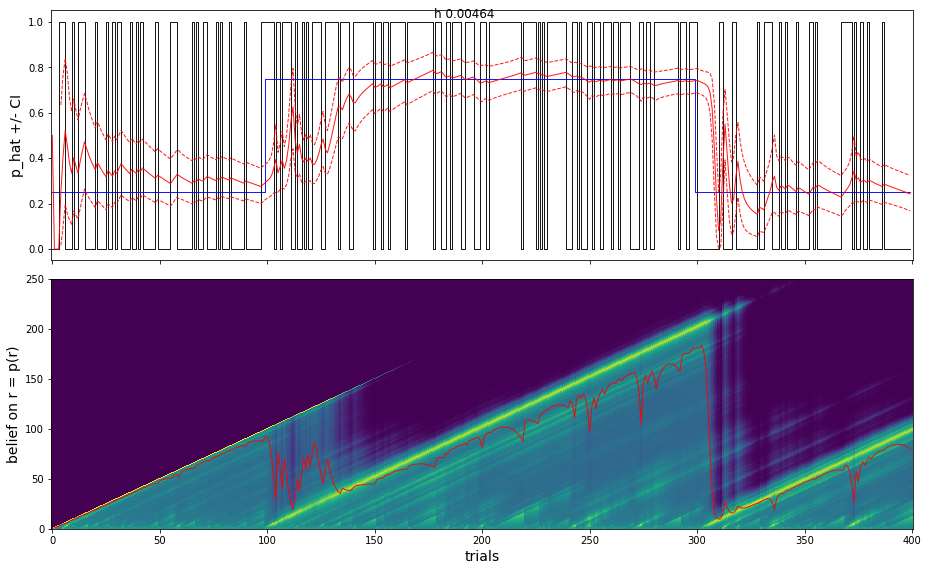

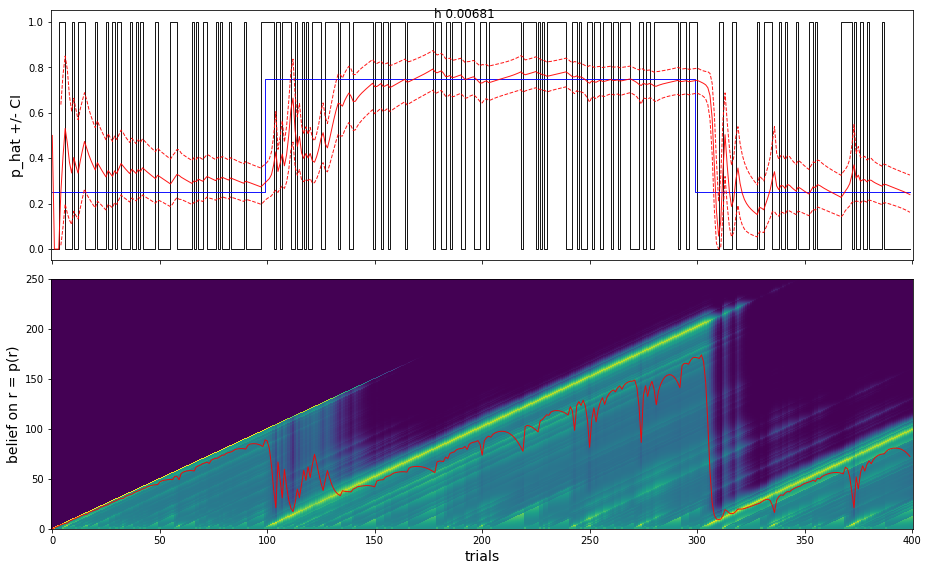

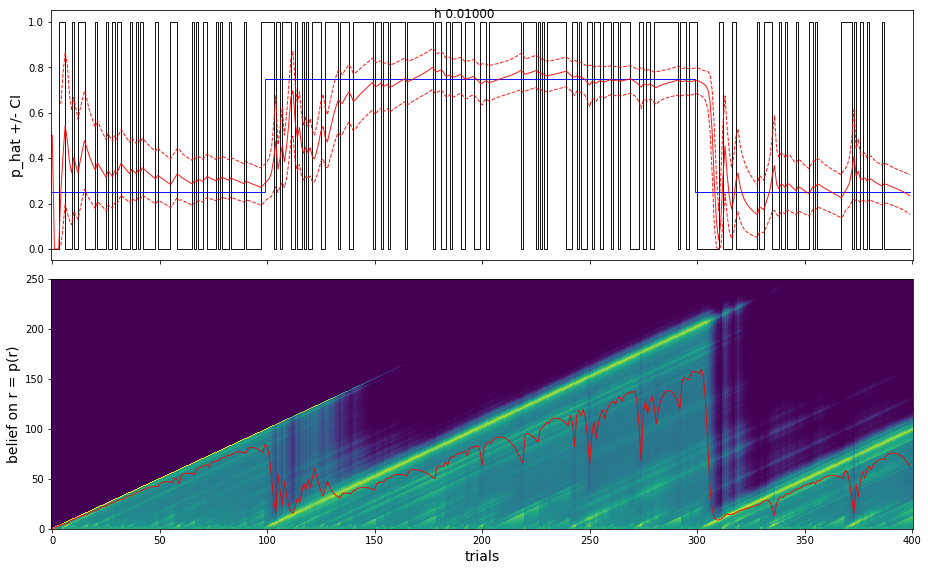

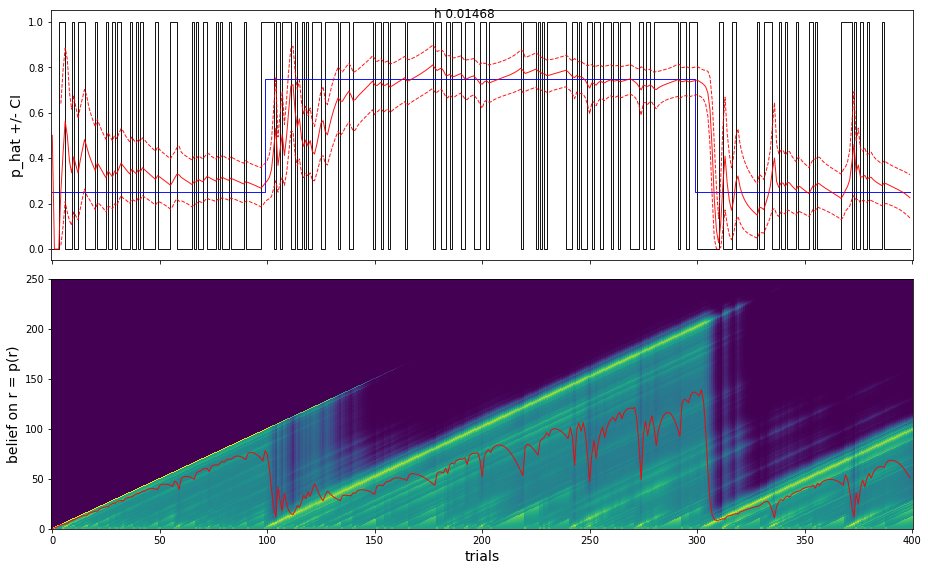

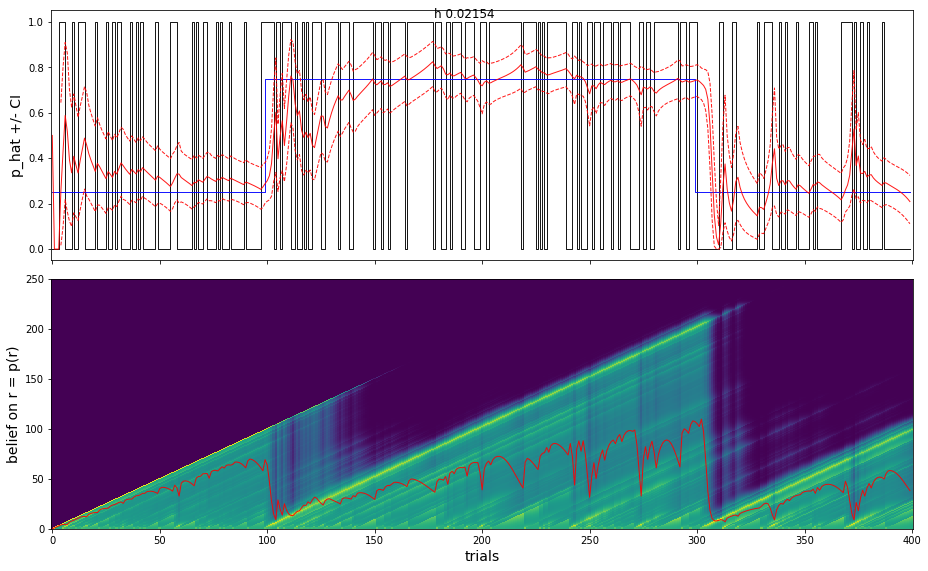

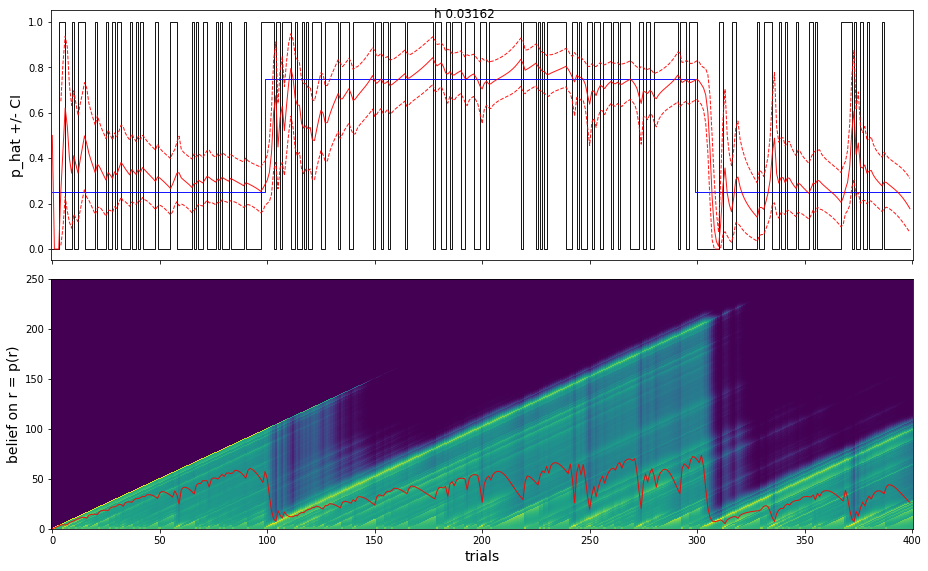

In [12]:
hs = 1./100*np.logspace(-.5, .5, 7, endpoint=True)
for h_ in hs:
    p_bar, r, beliefs = bcp.inference(o, h=h_, p0=.5)
    fig, axs = bcp.plot_inference(o, p_gen, p_bar, r, beliefs, max_run_length=250, mode=mode)
    fig.suptitle('h %.5f' % h_)
    plt.show()

In [13]:
p_bar

array([[0.5       , 0.5       , 0.5       , ..., 0.5       , 0.5       ,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.50753769, 0.50753769,
        0.50753769],
       [0.        , 0.        , 0.        , ..., 0.        , 0.50626566,
        0.50626566],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.505     ]])

In [14]:
beliefs[:, 0], beliefs[0, :] 

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

In [15]:
p_hat = np.sum(p_bar[:, 1:] * r[:, :-1] * beliefs[:, :-1], axis=0)
p_hat            

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.96837722,
        1.77109963,  2.4624156 ,  2.19304176,  2.44313757,  2.39035501,
        3.23097007,  3.31006211,  3.35123719,  4.22008747,  5.11126165,
        5.64875124,  4.98119128,  5.69852815,  5.58650701,  5.29237332,
        4.88100028,  5.35326515,  6.21878094,  6.2464661 ,  5.97938307,
        5.62784042,  6.1849531 ,  6.73934026,  6.78680784,  7.48602354,
        7.55822581,  8.62558631,  9.30680894,  8.27158744,  9.20947772,
        9.12375648,  8.79958462,  9.29037188,  9.76307118,  9.90516984,
       10.57038018, 10.50837941, 11.6492076 , 11.18260617, 11.47987486,
       11.23079257, 10.79553683, 10.21407889,  9.50350379,  9.65135416,
       11.19602281, 11.34561231, 10.91715871, 10.34467366,  9.67088367,
        8.91787707,  9.07625235, 11.77508853, 11.35580162,  8.30377045,
       12.2408177 , 12.62130699, 12.33525555, 11.75024688, 10.97337453,
       10.0581324 , 10.01662441, 12.49810731, 13.73670691, 13.47

In [16]:
np.sum(r[:, :-1] * beliefs[:, :-1], axis=0)

array([ 0.        ,  0.96837722,  1.91738552,  2.85194374,  3.77417614,
        4.01242401,  3.96593158,  4.0619735 ,  6.1460273 ,  7.15053129,
        7.86170959,  8.91308111, 10.02418922, 10.74140844, 11.47282511,
       11.34509009, 10.7009495 , 13.49514933, 14.27128427, 14.5765994 ,
       14.56820615, 14.32472978, 17.20360617, 18.26896018, 18.53463012,
       18.54824178, 18.37227856, 20.66420738, 21.81390522, 22.01254542,
       23.05217707, 24.33720676, 24.41917482, 22.4603547 , 26.11294221,
       26.87952694, 26.94501659, 26.54888777, 28.78154624, 30.16306838,
       30.24315096, 31.01005821, 32.47589592, 32.11601505, 33.9319605 ,
       34.17806996, 33.86292144, 33.09659891, 31.92477608, 30.40081262,
       35.80388276, 37.27049987, 36.913217  , 36.08187486, 34.90613541,
       33.45138266, 31.78458134, 37.94299138, 33.98979228, 24.72893672,
       39.00265091, 41.38016204, 41.51523628, 40.64121103, 39.11480691,
       37.11098956, 34.77115366, 43.4459637 , 45.41331332, 45.31